In [2]:
import numpy as np
import pandas as pd
import pickle
import nltk
# from nltk.corpus import brown, stopwords
# from string import punctuation, ascii_lowercase
# from gensim.models import KeyedVectors
# from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
# from scipy.spatial.distance import cosine
from scipy import stats
# from scipy.sparse import csr_matrix
# from collections import Counter

In [5]:
!unzip diachronic_word2vec_embeddings.zip

Archive:  diachronic_word2vec_embeddings.zip
   creating: embeddings/
  inflating: embeddings/data.pkl     
   creating: __MACOSX/
   creating: __MACOSX/embeddings/
  inflating: __MACOSX/embeddings/._data.pkl  
  inflating: embeddings/readme.txt   
  inflating: __MACOSX/embeddings/._readme.txt  
  inflating: __MACOSX/._embeddings   


# 2 Diachronic Word Embeddings

## Step 1

In [14]:
# !unzip diachronic_word2vec_embeddings.zip

In [3]:
"""
'w': a list of 2000 words, a subset of the English lexicon
'd': a list of decades between 1900 and 2000 -> granularity of time: decade 1900-1910-...-2000
'E': a 2000 by 10 by 300 list of list of vectors; the (i,j)-th entry is a 300-dimensional vector for the i-th word in the j-th decade
"""
dia_emb = pd.read_pickle("embeddings/data.pkl")

In [17]:
w = dia_emb['w']
d = dia_emb['d']
E = dia_emb['E']

## Step 2 report the top 20 most and least changing words
## Methods according to the paper presented in class
### Method 1 Frequency-based
- One way of tracking semantic changes is by counting raw word frequency (Hilpert & Gries, 2009) 
- or counting the frequency of a word collocating with another word over time (Heyer, Holz, & Teresniak, 2009)

### Method 2 Syntax-based
- changes in POS tags

### Method 3 Distribution-based Embedding-based
- changes in vectors?

### Other Recent Methods
- Montariol (2021) describes two measures that can be used to track semantic change over time:
    - Inceptive drift, which computes the change of a word compared to that word at time t=0
    - Incremental drift, which computes the change of a word from one time slice to the next
- The cosine similarity can be calculated for a word at one time period to a predetermined list of words and the same word to the same list at the next time period to measure semantic change. 

## My Method 1: [Incremental drift] Mean Cosine Distance Per Decade Over Time 

In [34]:
distances_1 = []
for i in range(len(w)):
    d = 0
    for j in range(9):
        d += 1 - cosine_similarity([np.array(E[i][j])], [np.array(E[i][j+1])])[0][0]
    distances_1.append(d / 9)
    
sorted = np.argsort(distances_1)

most_changes = [w[a] for a in sorted[-20:]]
print('most_changes',most_changes)

least_changes = [w[a] for a in sorted[:20]] 
print('least_changes',least_changes)

most_changes ['haven', 'goals', 'johnson', 'therapy', 'adams', 'wilson', 'princeton', 'martin', 'baltimore', 'wiley', 'berkeley', 'techniques', 'sector', 'ml', 'jones', 'harper', 'mcgraw', 'skills', 'computer', 'shri']
least_changes ['april', 'miles', 'november', 'september', 'january', 'december', 'february', 'university', 'vessels', 'trees', 'cent', 'solution', 'july', 'decrease', 'october', 'temperature', 'buildings', 'june', 'patients', 'blood']


## My Method 2: [Incremental drift] Max Cosine Distance Over Time

In [19]:
distances_2 = []
for i in range(len(w)):
    d = 0
    for j in range(9):
        dd = 1 - cosine_similarity([np.array(E[i][j])], [np.array(E[i][j+1])])[0][0]
        d = max(d,dd)
    distances_2.append(d)

sorted = np.argsort(distances_2)

most_changes = [w[a] for a in sorted[-20:]]
print('most_changes',most_changes)

least_changes = [w[a] for a in sorted[:20]] 
print('least_changes',least_changes)

most_changes ['jones', 'radio', 'implications', 'variables', 'jobs', 'procedures', 'wiley', 'therapy', 'input', 'evaluation', 'programs', 'sector', 'objectives', 'goals', 'skills', 'shri', 'mcgraw', 'ml', 'computer', 'techniques']
least_changes ['april', 'november', 'december', 'january', 'september', 'trees', 'miles', 'solution', 'feet', 'june', 'february', 'vessels', 'century', 'duties', 'cent', 'blood', 'evening', 'buildings', 'decrease', 'july']


## My Method 3: [Inceptive drift] The Cosine Distance change between the word at the start time and at the end time

In [23]:
distances_3 = []
for i in range(len(w)):
    d = 1 - cosine_similarity(np.array([E[i][0]]), np.array([E[i][-1]]))[0][0]
    distances_3.append(d)

sorted = np.argsort(distances_3)

most_changes = [w[a] for a in sorted[-20:]]
print('most_changes',most_changes)

least_changes = [w[a] for a in sorted[:20]] 
print('least_changes',least_changes)

most_changes ['film', 'shift', 'berkeley', 'patterns', 'perspective', 'impact', 'media', 'shri', 'van', 'approach', 'goals', 'sector', 'radio', 'computer', 'objectives', 'programs', 'techniques', 'ml', 'skills', 'mcgraw']
least_changes ['april', 'june', 'november', 'february', 'years', 'october', 'increase', 'january', 'century', 'months', 'daughter', 'december', 'god', 'september', 'feet', 'week', 'evening', 'door', 'payment', 'miles']


## My Method 4: [Incremental drift] Min Cosine Distance Over Time¶

In [21]:
distances_4 = []
for i in range(len(w)):
    ddd = 0
    for j in range(9):
        dd =1 - cosine_similarity([np.array(E[i][j])], [np.array(E[i][j+1])])[0][0]
        ddd = min(dd,ddd)
    distances_4.append(ddd)

sorted = np.argsort(distances_4)

most_changes = [w[a] for a in sorted[-20:]]
print('most_changes',most_changes)

least_changes = [w[a] for a in sorted[:20]] 
print('least_changes',least_changes)

most_changes ['necessity', 'ratio', 'measures', 'credit', 'corner', 'attitude', 'reality', 'rates', 'plants', 'staff', 'pain', 'centre', 'oxford', 'parliament', 'aspects', 'russia', 'liberty', 'news', 'establishment', 'regards']
least_changes ['time', 'formula', 'rooms', 'film', 'equilibrium', 'colour', 'components', 'participation', 'ministers', 'blow', 'crowd', 'yield', 'berlin', 'baby', 'song', 'waste', 'sunday', 'quarters', 'leadership', 'pocket']


## Step 3. Propose and justify a procedure for evaluating the accuracy of the methods 
you have proposed in Step 2, and then evaluate the three methods following this proposed procedure
and report Pearson correlations or relevant test statistics. [2 points]

In [29]:
most_similar = {}
K = 10

for i in range(len(w)):
    most_similar[w[i]] = [[] for l in range(10)]
    for j in range(10):
        sims = []
        matrix = np.array(E)[:,j,:]
        indexes = np.linalg.norm((matrix - E[i][j]), axis=1).argsort()
        sims = [w[a] for a in indexes[:K] if w[a] != w[i]]
        most_similar[w[i]][j].extend(sims[:K])

In [31]:
distances_5 = [] # 
for i in range(len(w)):
    d = ( K - len( [a for a in most_similar[w[i]][0] if a in most_similar[w[i]][9]] ) ) / K
    distances_5.append(d)

In [63]:
distances = [distances_1, distances_2, distances_3, distances_5]
array = np.ones((4,4))

for i in range(4):
    for j in range(4):
        if i != j:
            pr = stats.pearsonr(distances[i], distances[j])
            array[i,j] = pr[0]
array

array([[1.        , 0.84506762, 0.6932991 , 0.21989351],
       [0.84506762, 1.        , 0.68926445, 0.23627123],
       [0.6932991 , 0.68926445, 1.        , 0.43578751],
       [0.21989351, 0.23627123, 0.43578751, 1.        ]])

### Evaluation:
The above pearson correlation array illustrates the evaluation approach I adopted for calcaulating the accuracies of [My Method 1, 2, 3]. The *pearsonr* result shows that the best method is My Method 1.
### Justification: 
The less correlated the distances_i (i = 1, 2, 3) is with distances_5 (the distances between the word and its most similar word), the more the method captures the semantic changes in the word over time.

## Step 4. Extract the top 3 changing words using the best method from Steps 2 and 3. 
Propose and implement a simple way of detecting the point(s) of semantic change in each word based
on its diachronic embedding time course—visualize the time course and the detected change
point(s). [3 points]

In [28]:
import matplotlib.pyplot as plt
# import seaborns as sns

In [65]:
sorted = np.argsort(distances_1)

top_3_most_changes = [w[a] for a in sorted[-3:]]

print('top_3_most_changes', top_3_most_changes)

m_distances = [[] for i in range(len(top_3_most_changes))]
for i in range(len(top_3_most_changes)):
    for j in range(10):
        d = (K - len([a for a in most_similar[w[i]][j] if a in most_similar[w[i]][0]])) / K
        m_distances[i].append(d)

top_3_most_changes ['skills', 'computer', 'shri']


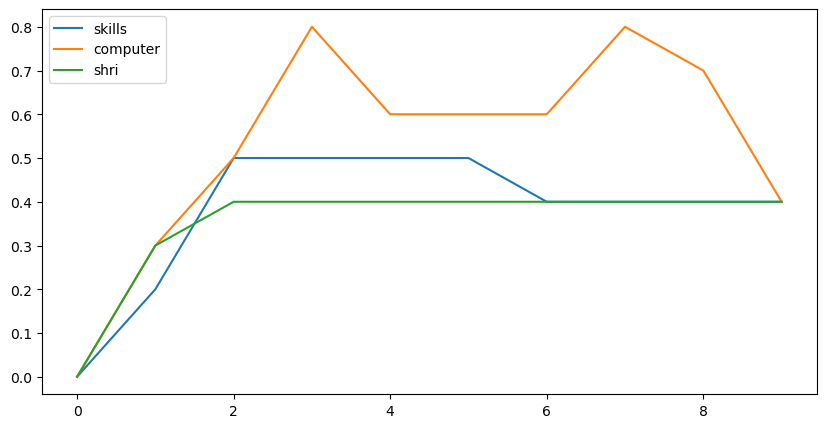

In [66]:
plt.figure(figsize = (10,5))
for i in range(len(m_distances)):
    plt.plot(m_distances[i], label=top_3_most_changes[i])
plt.legend()
plt.show()